In [1]:
import torch
torch.cuda.is_available()
# Cell 1: Install required libraries (if not already installed)
!pip install torch torchvision scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# Diabetes Dataset (Instructor-Led):
# Regression Task:
# •	Objective: Predict the quantitative progression of diabetes.
# •	Steps:
# 1.	Dataset Preparation:
# 	Load the Diabetes Dataset using load_diabetes() from sklearn.datasets.
# 	Preprocess the data using StandardScaler.
# 	Split the data into training and test sets using train_test_split.
# 	Convert the data into PyTorch tensors.
# 2.	Neural Network Definition:
# 	Build a feedforward neural network:
# 	Input layer size = number of features (10).
# 	Two hidden layers with 64 and 32 units, using ReLU activation.
# 	Output layer with one neuron for regression.
# 3.	Training:
# 	Use MSELoss as the loss function and Adam as the optimizer.
# 	Train for 100 epochs, logging the loss every 10 epochs.
# 4.	Evaluation:
# 	Calculate mean squared error and R-squared.
# 	Visualize predictions vs. true values using matplotlib.


In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Cell 3: Set device for GPU acceleration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Cell 4: Dataset Preparation
## 4.1 Load and preprocess the Diabetes Dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
print("Initial data shape:", X_diabetes.shape, y_diabetes.shape)

# Convert the target to binary for classification
threshold = y_diabetes.mean()
y_diabetes_binary = (y_diabetes > threshold).astype(int)
print("Threshold for classification:", threshold)
print("Binary target values (first 10):", y_diabetes_binary[:10])

# Train-test split for regression and classification
data_split = train_test_split(
    X_diabetes, y_diabetes, y_diabetes_binary, test_size=0.2, random_state=42
)
X_train_d, X_test_d, y_train_d, y_test_d, y_train_d_binary, y_test_d_binary = data_split
print("Train/Test split shapes:", X_train_d.shape, X_test_d.shape)

# Standardize features
scaler_d = StandardScaler()
X_train_d = scaler_d.fit_transform(X_train_d)
X_test_d = scaler_d.transform(X_test_d)
print("Sample standardized features (first 5 rows):", X_train_d[:5])

# Convert to PyTorch tensors
X_train_d_tensor = torch.tensor(X_train_d, dtype=torch.float32).to(device)
X_test_d_tensor = torch.tensor(X_test_d, dtype=torch.float32).to(device)
y_train_d_tensor = torch.tensor(y_train_d, dtype=torch.float32).view(-1, 1).to(device)
y_test_d_tensor = torch.tensor(y_test_d, dtype=torch.float32).view(-1, 1).to(device)
y_train_d_binary_tensor = torch.tensor(y_train_d_binary, dtype=torch.float32).view(-1, 1).to(device)
y_test_d_binary_tensor = torch.tensor(y_test_d_binary, dtype=torch.float32).view(-1, 1).to(device)

Initial data shape: (442, 10) (442,)
Threshold for classification: 152.13348416289594
Binary target values (first 10): [0 0 0 1 0 0 0 0 0 1]
Train/Test split shapes: (353, 10) (89, 10)
Sample standardized features (first 5 rows): [[ 1.49836523  1.06136988  0.21990201  1.13887373  0.72847289  1.05589332
  -0.82445065  0.71103773  0.54748197 -0.06144896]
 [-0.22885822  1.06136988 -0.41936607 -0.71059105 -0.4249289   0.27242452
  -1.52979055  1.4842858  -0.01975653  0.36723647]
 [ 0.08518241 -0.94217861  1.01898711  1.99247286 -0.30958872 -0.32669867
  -0.11911075 -0.06221033  0.3312366  -0.31866022]
 [-0.621409   -0.94217861 -0.78466212 -0.63945779 -1.17464007 -1.21550781
   0.66460025 -0.83545839 -1.06968217 -2.71929861]
 [-0.54289885 -0.94217861 -1.4239302  -1.7064567  -0.79978448 -1.11016747
   1.29156905 -1.60870645 -0.80285867 -0.91881982]]


```
what the view (-1, 1) does?


Let's say y_train_d is a NumPy array or a PyTorch tensor with shape (5,), meaning it has 5 elements in a single dimension (a 1D tensor).

y_train_d = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)  # Shape: (5,)

Now, applying .view(-1, 1):

This reshapes it into a column vector:
tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

```



In [5]:
# Cell 5: Define the Feedforward Neural Network for Regression and Classification
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FeedforwardNN, self).__init__()
        self.hidden1 = nn.Linear(input_dim, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, classification=False):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        if classification:
            x = self.sigmoid(x)
        return x

# Initialize models
model_regression = FeedforwardNN(X_train_d.shape[1], 1).to(device)
model_classification = FeedforwardNN(X_train_d.shape[1], 1).to(device)
print("Models initialized.")

Models initialized.


```
For the classification, we take sigmoid. Sigmoid makes it between 0 and 1. Which is the probability of the class.
For the regression, we didn't took the sigmoid.
```

In [6]:
# Cell 6: Define Loss Functions and Optimizers
criterion_regression = nn.MSELoss()
criterion_classification = nn.BCELoss()
optimizer_regression = optim.Adam(model_regression.parameters(), lr=0.01)
optimizer_classification = optim.Adam(model_classification.parameters(), lr=0.01)
print("Loss functions and optimizers defined.")

Loss functions and optimizers defined.


For the regression it is mean sqare loss
For the classification it is binary cross entropy loss.



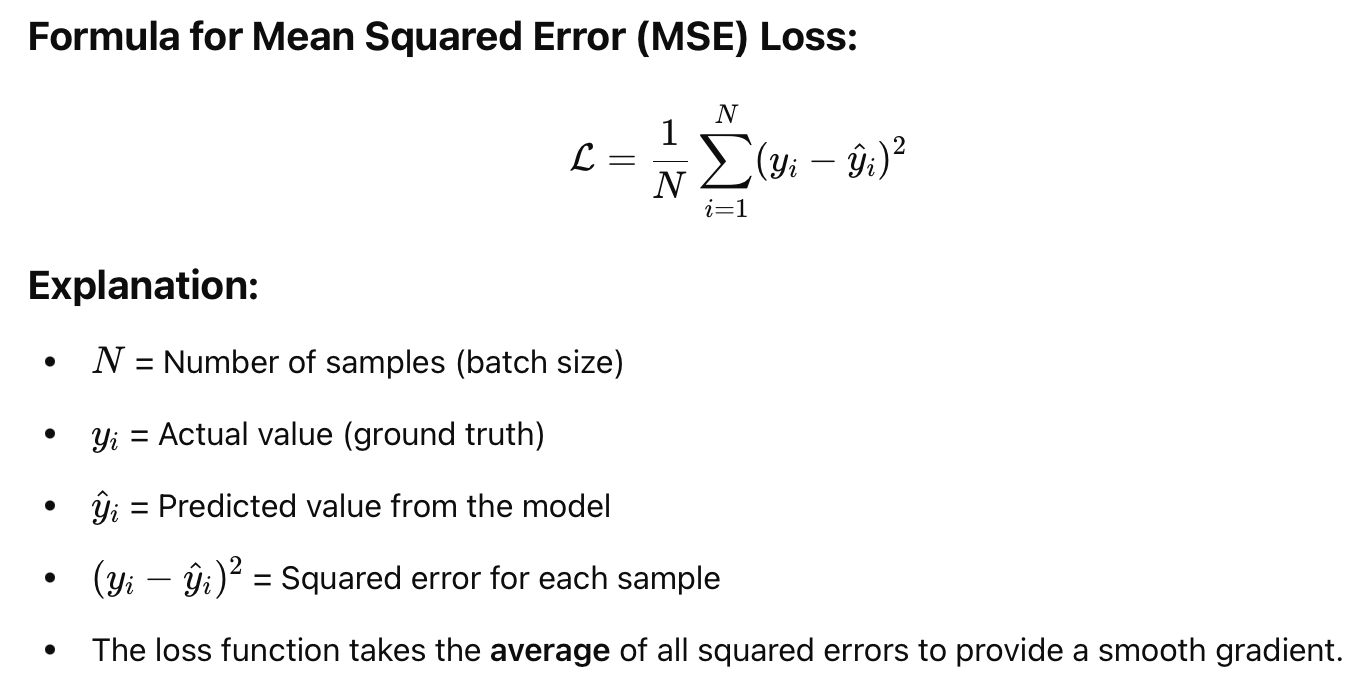

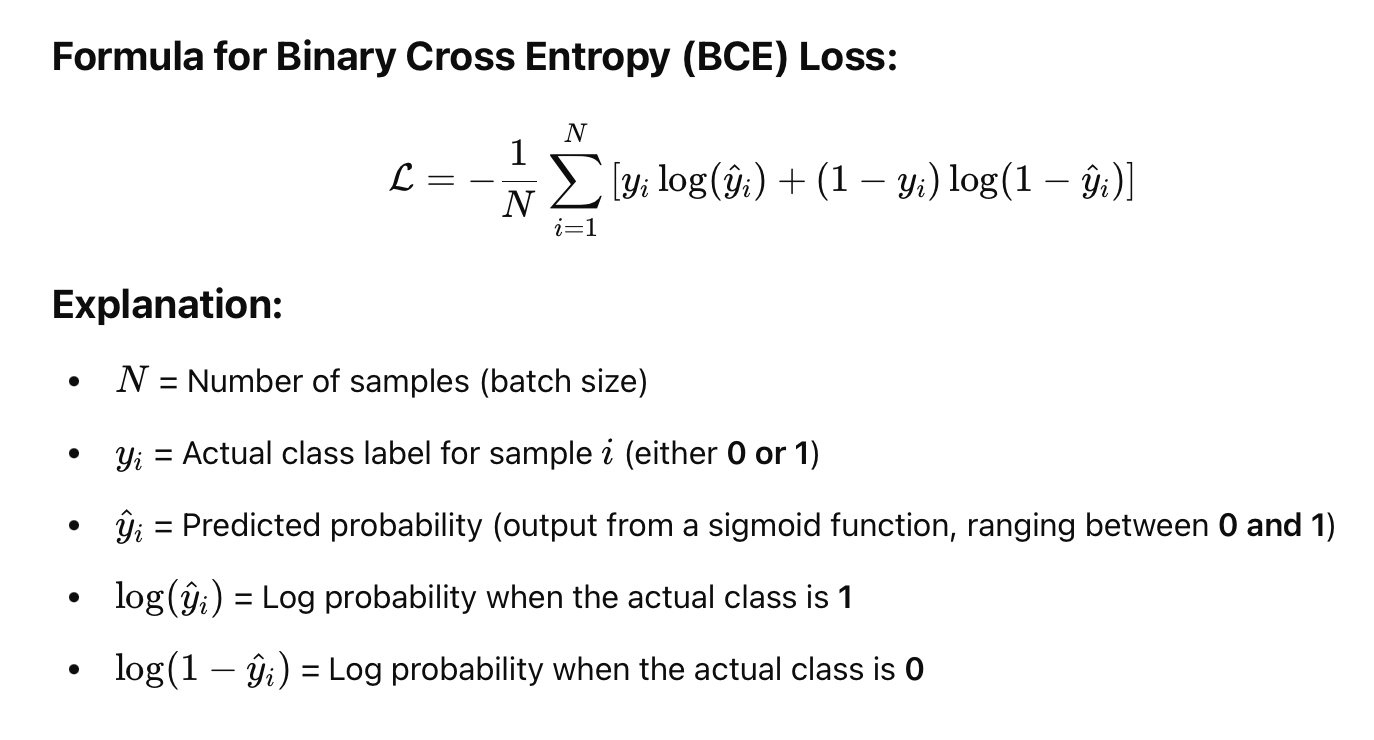

In [7]:
# Cell 7: Train the Models
def train_model(model, optimizer, X_train, y_train, criterion, epochs=100, classification=False):
    for epoch in range(epochs):
        model.train()
        inputs = X_train
        targets = y_train

        # Forward pass
        predictions = model(inputs, classification=classification)
        loss = criterion(predictions, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Train the Regression model
print("Training Regression Model")
train_model(model_regression, optimizer_regression, X_train_d_tensor, y_train_d_tensor, criterion_regression)

# Train the Classification model
print("Training Classification Model")
train_model(model_classification, optimizer_classification, X_train_d_tensor, y_train_d_binary_tensor, criterion_classification, classification=True)

Training Regression Model
Epoch 10/100, Loss: 28169.3672
Epoch 20/100, Loss: 20905.7812
Epoch 30/100, Loss: 7623.9331
Epoch 40/100, Loss: 6253.5454
Epoch 50/100, Loss: 3971.4736
Epoch 60/100, Loss: 3518.4531
Epoch 70/100, Loss: 3200.7683
Epoch 80/100, Loss: 2995.2354
Epoch 90/100, Loss: 2872.1440
Epoch 100/100, Loss: 2786.4778
Training Classification Model
Epoch 10/100, Loss: 0.4650
Epoch 20/100, Loss: 0.4336
Epoch 30/100, Loss: 0.3944
Epoch 40/100, Loss: 0.3432
Epoch 50/100, Loss: 0.2710
Epoch 60/100, Loss: 0.1833
Epoch 70/100, Loss: 0.1167
Epoch 80/100, Loss: 0.0668
Epoch 90/100, Loss: 0.0369
Epoch 100/100, Loss: 0.0210


Regression predictions (first 5): [169.94038  192.11649  146.33421  307.2739    90.759026]
Regression Model - MSE: 3000.0784, R-squared: 0.4338
Classification predictions (first 5): [False False  True  True False]
Classification Model - Accuracy: 0.7753


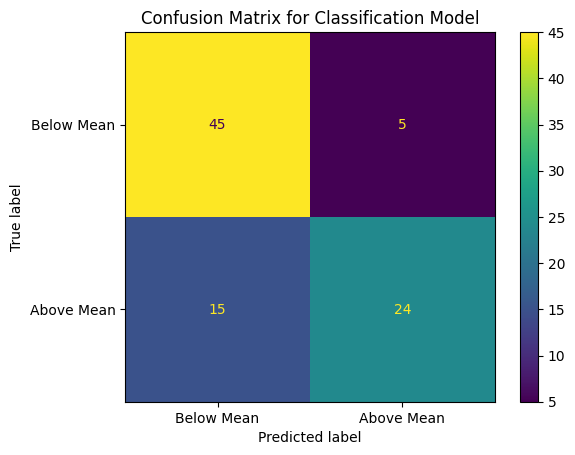

In [8]:
# Cell 8: Evaluate the Models
def evaluate_model_regression(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test).cpu().numpy()
        mse = mean_squared_error(y_test.cpu().numpy(), predictions)
        r2 = r2_score(y_test.cpu().numpy(), predictions)
        print("Regression predictions (first 5):", predictions[:5].flatten())
    return mse, r2

def evaluate_model_classification(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test, classification=True).cpu().numpy() > 0.5
        accuracy = accuracy_score(y_test.cpu().numpy(), predictions)
        cm = confusion_matrix(y_test.cpu().numpy(), predictions)
        print("Classification predictions (first 5):", predictions[:5].flatten())
    return accuracy, cm

# Evaluate the Regression model
mse_d, r2_d = evaluate_model_regression(model_regression, X_test_d_tensor, y_test_d_tensor)
print(f"Regression Model - MSE: {mse_d:.4f}, R-squared: {r2_d:.4f}")

# Evaluate the Classification model
accuracy_d, cm_d = evaluate_model_classification(model_classification, X_test_d_tensor, y_test_d_binary_tensor)
print(f"Classification Model - Accuracy: {accuracy_d:.4f}")

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_d, display_labels=["Below Mean", "Above Mean"]).plot()
plt.title("Confusion Matrix for Classification Model")
plt.show()

From all these i just forgot the maths behind the r2. That what it signifies.

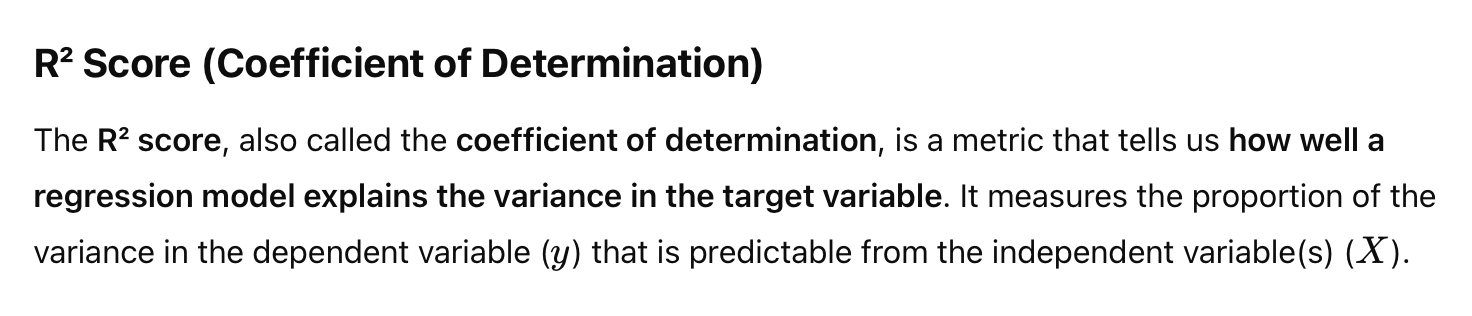

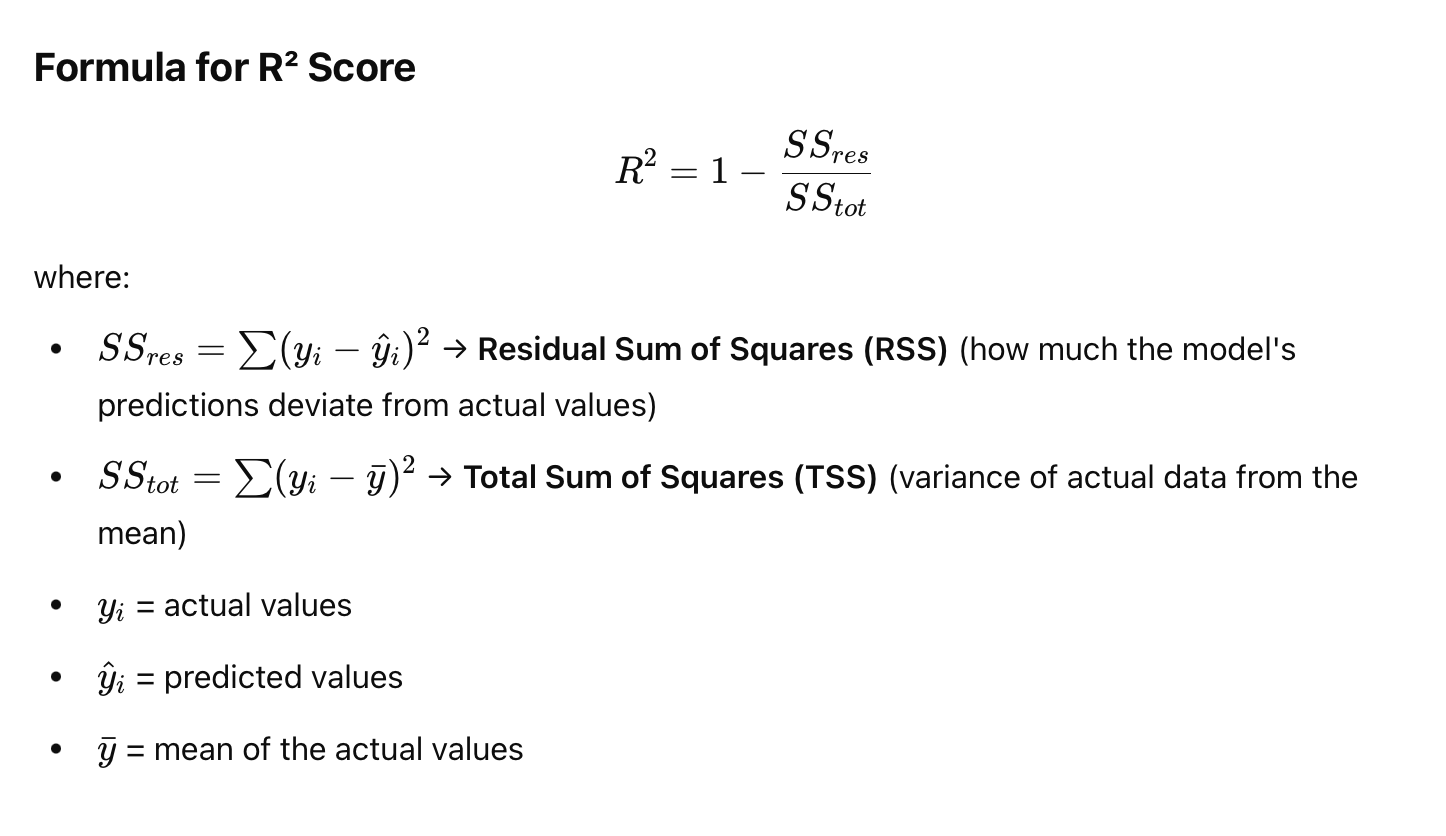

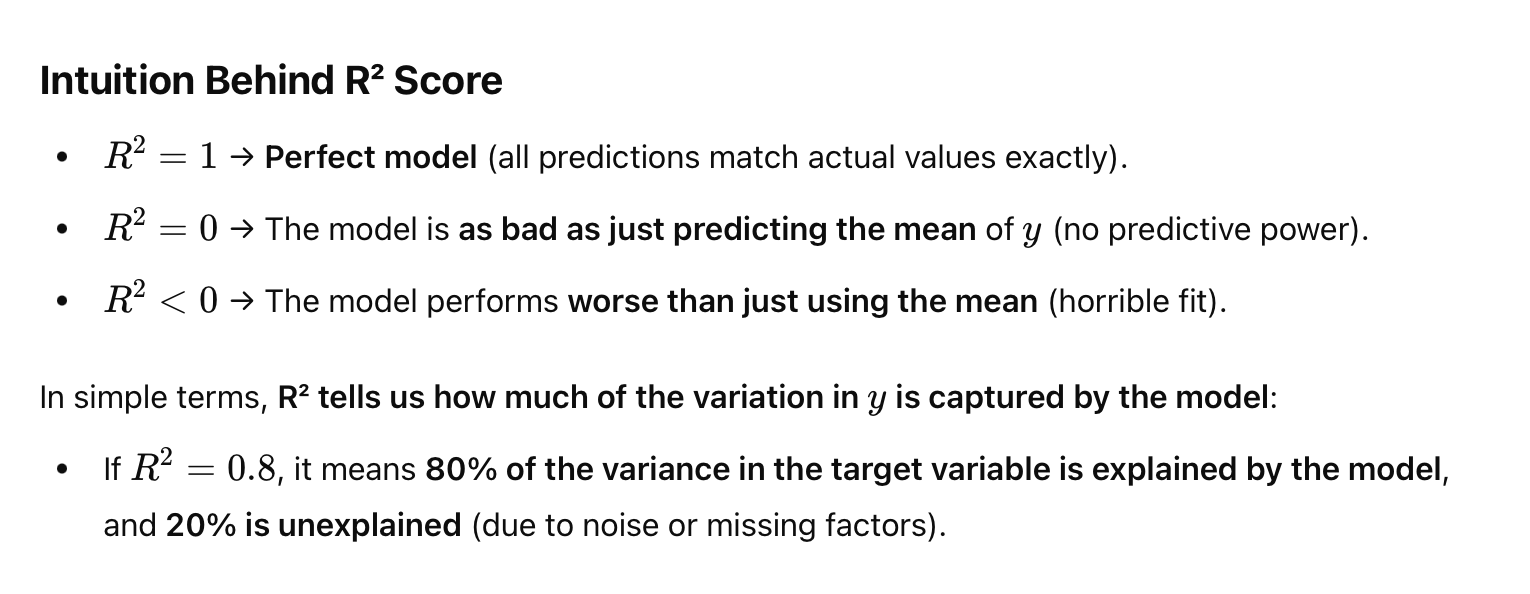

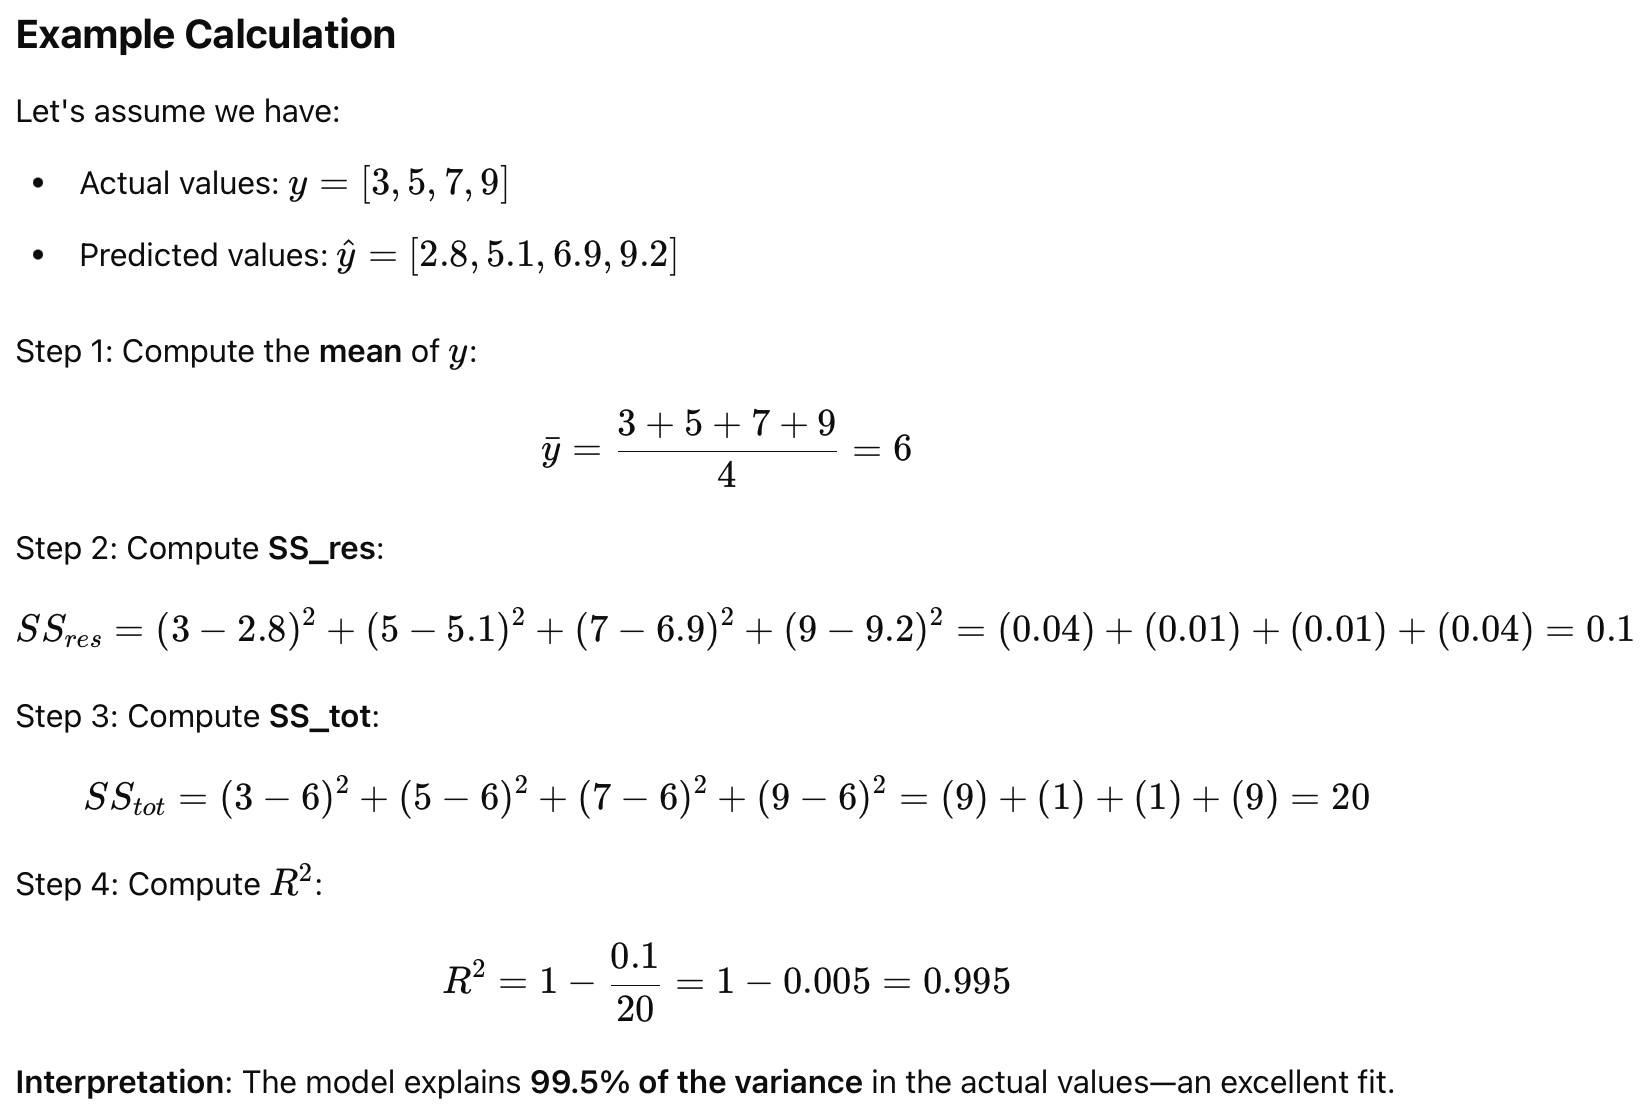

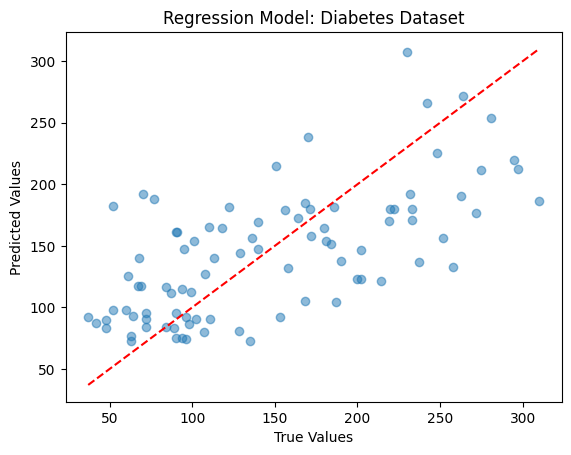

In [9]:
# Cell 9: Visualize the Results
def plot_results_regression(y_test, predictions, title):
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

# Visualize results for the Regression model
with torch.no_grad():
    predictions_d = model_regression(X_test_d_tensor).cpu().numpy()
    plot_results_regression(y_test_d_tensor.cpu().numpy(), predictions_d, "Regression Model: Diabetes Dataset")

In [ ]:
# The thing is that the above code was provided by faculty, but the below code i generated...

Epoch [10/100], Loss: 27500.1250
Epoch [20/100], Loss: 18069.3789
Epoch [30/100], Loss: 5893.7969
Epoch [40/100], Loss: 5054.4634
Epoch [50/100], Loss: 3901.7039
Epoch [60/100], Loss: 3307.3137
Epoch [70/100], Loss: 3067.1707
Epoch [80/100], Loss: 2942.8088
Epoch [90/100], Loss: 2846.0972
Epoch [100/100], Loss: 2781.4414
Mean Squared Error: 3018.8640
R-squared: 0.4302


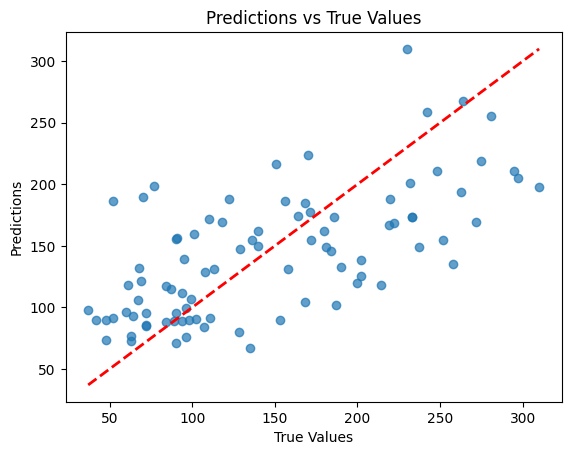

In [ ]:
# 1. Dataset Preparation
# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 2. Neural Network Definition
class DiabetesRegressor(nn.Module):
    def __init__(self):
        super(DiabetesRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = DiabetesRegressor()

# 3. Training
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. Evaluation
# Make predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Calculate metrics
y_pred_np = y_pred.numpy()
y_test_np = y_test_tensor.numpy()

mse = mean_squared_error(y_test_np, y_pred_np)
r2 = r2_score(y_test_np, y_pred_np)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualization
plt.scatter(y_test_np, y_pred_np, alpha=0.7)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.show()


In [ ]:
# Classification Task:
# • Objective: Classify patients into "low progression" or "high progression" based on a
# threshold (e.g., median progression value).
# • Steps:
# 1. Dataset Preparation:
# ▪ Use the same Diabetes Dataset but create binary labels:
# ▪ Label patients as 1 (high progression) or 0 (low progression).
# ▪ Use the median progression value as the threshold.
# ▪ Split the data into training and test sets and preprocess it.
# ▪ Convert the data into PyTorch tensors.
# 2. Neural Network Definition:
# ▪ Build a feedforward neural network:
# ▪ Input layer size = number of features (10).
# ▪ Two hidden layers with 64 and 32 units, using ReLU activation.
# ▪ Output layer with 2 neurons for binary classification (softmax
# activation).
# 3. Training:
# ▪ Use CrossEntropyLoss as the loss function and Adam as the optimizer.
# ▪ Train for 100 epochs, logging the loss every 10 epochs.
# 4. Evaluation:
# ▪ Calculate metrics such as accuracy, precision, recall, and F1-score.
# ▪ Generate a confusion matrix and visualize it

Epoch [10/100], Loss: 0.4726
Epoch [20/100], Loss: 0.4141
Epoch [30/100], Loss: 0.3572
Epoch [40/100], Loss: 0.2919
Epoch [50/100], Loss: 0.2140
Epoch [60/100], Loss: 0.1409
Epoch [70/100], Loss: 0.0786
Epoch [80/100], Loss: 0.0419
Epoch [90/100], Loss: 0.0218
Epoch [100/100], Loss: 0.0120
Accuracy: 0.7416
Precision: 0.7073
Recall: 0.7250
F1 Score: 0.7160


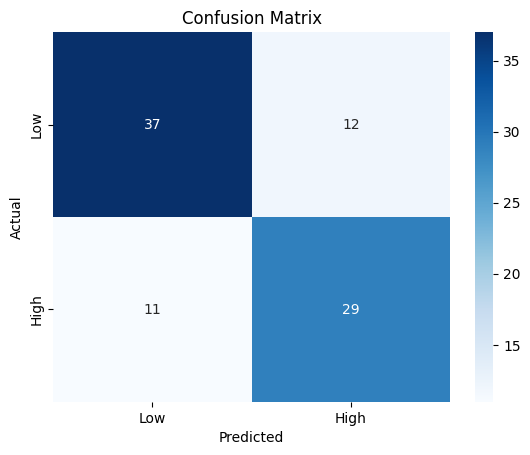

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset Preparation
# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Create binary labels
threshold = np.median(y)
y_binary = (y > threshold).astype(int)

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 2. Neural Network Definition
class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = DiabetesClassifier()

# 3. Training
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. Evaluation
# Make predictions
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_logits, axis=1).numpy()

# Calculate metrics
y_test_np = y_test_tensor.numpy()
accuracy = accuracy_score(y_test_np, y_pred)
precision = precision_score(y_test_np, y_pred)
recall = recall_score(y_test_np, y_pred)
f1 = f1_score(y_test_np, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
